Geocoding¶
Geocoding is the process of converting the name of a place or an address to a location on a map. If you have ever looked up a geographic location based on a landmark description with Google Maps, Bing Maps, or Baidu Maps, for instance, then you have used a geocoder!  

ie if i need location of 'university of Waterloo' i can use geocode...

In [1]:
from geopandas.tools import geocode
from geopy.geocoders import Nominatim
import matplotlib
import folium

In [5]:
geolocator = Nominatim(user_agent="antonyjoy07@gmail.com")
location = geolocator.geocode("University of Waterloo")
location1=geolocator.geocode("kitchener")
print(location.address)
print(location1.address)

University of Waterloo, Wilmot, Region of Waterloo, Southwestern Ontario, Ontario, Canada
Kitchener, Region of Waterloo, Southwestern Ontario, Ontario, Canada


In [7]:
########use below code for not limiting nomatim
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

geolocator = Nominatim(user_agent="application")

reverse = RateLimiter(geolocator.reverse, min_delay_seconds=1)

location = reverse((50.6539239, -120.3385242), language='en', exactly_one=True)

location.raw

{'place_id': 128290085,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 158948629,
 'lat': '50.6539185',
 'lon': '-120.33851313305018',
 'display_name': '142, Waddington Drive, Upper Sahali, Kamloops, Thompson-Nicola Regional District, British Columbia, V2E 1P7, Canada',
 'address': {'house_number': '142',
  'road': 'Waddington Drive',
  'suburb': 'Upper Sahali',
  'city': 'Kamloops',
  'county': 'Thompson-Nicola Regional District',
  'state': 'British Columbia',
  'postcode': 'V2E 1P7',
  'country': 'Canada',
  'country_code': 'ca'},
 'boundingbox': ['50.6538009', '50.6539657', '-120.3386792', '-120.3383211']}

In [ ]:
print((location.latitude, location.longitude))
print(location.point)

In [17]:
from   folium.plugins import MarkerCluster
from branca.element import Figure
fig=Figure(width=550,height=350)

In [18]:
fig3=Figure(width=550,height=350)
COO=(location.latitude, location.longitude)   #it does not have to  be a tuple,can also be list
map=folium.Map(location=COO,zoom_start=12)
fig3.add_child(map)

folium.Marker(location=(location.latitude, location.longitude),popup=location.address,tooltip='<strong>Click here to see Popup</strong>').add_to(map)
folium.CircleMarker(location=(location1.latitude, location1.longitude),radius=20,popup=location1.address,fill=True,color='Blue',fill_color='Yellow',fill_opacity=0.6).add_to(map)
display(map)




In [19]:
import pandas as pd
import matplotlib.pyplot as plt
add1="C:/Users/ANTHONY/Desktop/CSV&XLSX/statenames.xlsx"
indcities=pd.read_excel(add1)

indcities = indcities.dropna() 

indcities

,S.No,States Name,Capital,Founded on
0,1.0,Andhra Pradesh,Hyderabad,1 Nov. 1956
1,2.0,Arunachal Pradesh,Itanagar,20 Feb. 1987
2,3.0,Assam,Dispur,26 Jan. 1950
3,4.0,Bihar,Patna,26 Jan. 1950
4,5.0,Chhattisgarh,Raipur,1 Nov. 2000
5,6.0,Goa,Panaji,30 May. 1987
6,7.0,Gujarat,Gandhinagar,1 May. 1960
7,8.0,Haryana,Chandigarh,1 Nov. 1966
8,9.0,Himachal Pradesh,Shimla,25 Jan. 1971
9,10.0,Jharkhand,Ranchi,15 Nov. 2000


### PANDAS AND GEOCODING

In [20]:
city_lat=[]
city_lng=[]
for i in indcities.Capital:
    loco=geolocator.geocode(i)
    city_lat.append(loco.latitude)
    city_lng.append(loco.longitude)
   
indcities['Latitude'], indcities['Longitude']=city_lat,city_lng
indcities

,S.No,States Name,Capital,Founded on,Latitude,Longitude
0,1.0,Andhra Pradesh,Hyderabad,1 Nov. 1956,17.360589,78.474061
1,2.0,Arunachal Pradesh,Itanagar,20 Feb. 1987,27.097966,93.623729
2,3.0,Assam,Dispur,26 Jan. 1950,26.151308,91.793380
3,4.0,Bihar,Patna,26 Jan. 1950,25.609324,85.123525
4,5.0,Chhattisgarh,Raipur,1 Nov. 2000,21.237947,81.633683
5,6.0,Goa,Panaji,30 May. 1987,15.498995,73.828214
6,7.0,Gujarat,Gandhinagar,1 May. 1960,23.223288,72.649227
7,8.0,Haryana,Chandigarh,1 Nov. 1966,30.733442,76.779714
8,9.0,Himachal Pradesh,Shimla,25 Jan. 1971,31.104153,77.170973
9,10.0,Jharkhand,Ranchi,15 Nov. 2000,23.370035,85.325013


### PANDAS,GEOCODING using FUCNTION

In [21]:
def find_loc(serie):
    city_lat=[]
    city_lng=[]
    for i in serie:
        loco=geolocator.geocode(i)
        city_lat.append(loco.latitude)
        city_lng.append(loco.longitude)
    return city_lat,city_lng

x,y=find_loc(indcities.Capital)
indcities['L'], indcities['Lo']=x,y
indcities

,S.No,States Name,Capital,Founded on,Latitude,Longitude,L,Lo
0,1.0,Andhra Pradesh,Hyderabad,1 Nov. 1956,17.360589,78.474061,17.360589,78.474061
1,2.0,Arunachal Pradesh,Itanagar,20 Feb. 1987,27.097966,93.623729,27.097966,93.623729
2,3.0,Assam,Dispur,26 Jan. 1950,26.151308,91.793380,26.151308,91.793380
3,4.0,Bihar,Patna,26 Jan. 1950,25.609324,85.123525,25.609324,85.123525
4,5.0,Chhattisgarh,Raipur,1 Nov. 2000,21.237947,81.633683,21.237947,81.633683
5,6.0,Goa,Panaji,30 May. 1987,15.498995,73.828214,15.498995,73.828214
6,7.0,Gujarat,Gandhinagar,1 May. 1960,23.223288,72.649227,23.223288,72.649227
7,8.0,Haryana,Chandigarh,1 Nov. 1966,30.733442,76.779714,30.733442,76.779714
8,9.0,Himachal Pradesh,Shimla,25 Jan. 1971,31.104153,77.170973,31.104153,77.170973
9,10.0,Jharkhand,Ranchi,15 Nov. 2000,23.370035,85.325013,23.370035,85.325013


### DF TO GEODATAFRAME

method 1

In [22]:
from shapely.geometry import Point
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(indcities.Lo, indcities.L)]            #always rememebr 1st longitude and then latitude
cities = GeoDataFrame(indcities, geometry=geometry)
cities.crs = {'init': 'epsg:4326'}                       #epsg:3786 will make it into metres..........
cities


C:\Users\ANTHONY\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,S.No,States Name,Capital,Founded on,Latitude,Longitude,L,Lo,geometry
0,1.0,Andhra Pradesh,Hyderabad,1 Nov. 1956,17.360589,78.474061,17.360589,78.474061,POINT (78.47406 17.36059)
1,2.0,Arunachal Pradesh,Itanagar,20 Feb. 1987,27.097966,93.623729,27.097966,93.623729,POINT (93.62373 27.09797)
2,3.0,Assam,Dispur,26 Jan. 1950,26.151308,91.793380,26.151308,91.793380,POINT (91.79338 26.15131)
3,4.0,Bihar,Patna,26 Jan. 1950,25.609324,85.123525,25.609324,85.123525,POINT (85.12353 25.60932)
4,5.0,Chhattisgarh,Raipur,1 Nov. 2000,21.237947,81.633683,21.237947,81.633683,POINT (81.63368 21.23795)
5,6.0,Goa,Panaji,30 May. 1987,15.498995,73.828214,15.498995,73.828214,POINT (73.82821 15.49899)
6,7.0,Gujarat,Gandhinagar,1 May. 1960,23.223288,72.649227,23.223288,72.649227,POINT (72.64923 23.22329)
7,8.0,Haryana,Chandigarh,1 Nov. 1966,30.733442,76.779714,30.733442,76.779714,POINT (76.77971 30.73344)
8,9.0,Himachal Pradesh,Shimla,25 Jan. 1971,31.104153,77.170973,31.104153,77.170973,POINT (77.17097 31.10415)
9,10.0,Jharkhand,Ranchi,15 Nov. 2000,23.370035,85.325013,23.370035,85.325013,POINT (85.32501 23.37004)


method 2

In [23]:
import geopandas
from geopandas import GeoDataFrame
gdf = geopandas.GeoDataFrame(indcities, geometry=geopandas.points_from_xy(indcities.L, indcities.Lo))
gdf

,S.No,States Name,Capital,Founded on,Latitude,Longitude,L,Lo,geometry
0,1.0,Andhra Pradesh,Hyderabad,1 Nov. 1956,17.360589,78.474061,17.360589,78.474061,POINT (17.361 78.474)
1,2.0,Arunachal Pradesh,Itanagar,20 Feb. 1987,27.097966,93.623729,27.097966,93.623729,POINT (27.098 93.624)
2,3.0,Assam,Dispur,26 Jan. 1950,26.151308,91.793380,26.151308,91.793380,POINT (26.151 91.793)
3,4.0,Bihar,Patna,26 Jan. 1950,25.609324,85.123525,25.609324,85.123525,POINT (25.609 85.124)
4,5.0,Chhattisgarh,Raipur,1 Nov. 2000,21.237947,81.633683,21.237947,81.633683,POINT (21.238 81.634)
5,6.0,Goa,Panaji,30 May. 1987,15.498995,73.828214,15.498995,73.828214,POINT (15.499 73.828)
6,7.0,Gujarat,Gandhinagar,1 May. 1960,23.223288,72.649227,23.223288,72.649227,POINT (23.223 72.649)
7,8.0,Haryana,Chandigarh,1 Nov. 1966,30.733442,76.779714,30.733442,76.779714,POINT (30.733 76.780)
8,9.0,Himachal Pradesh,Shimla,25 Jan. 1971,31.104153,77.170973,31.104153,77.170973,POINT (31.104 77.171)
9,10.0,Jharkhand,Ranchi,15 Nov. 2000,23.370035,85.325013,23.370035,85.325013,POINT (23.370 85.325)


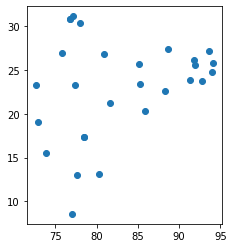

In [25]:
cities.plot()
plt.show()

In [16]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


<Figure size 1440x1440 with 0 Axes>

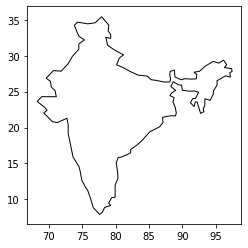

In [17]:
plt.figure(figsize=(20, 20))
# We restrict to India.
ax = world[world.name == 'India'].plot(color='white', edgecolor='black')       #plots india base on the polygon of lines from india

<AxesSubplot:>

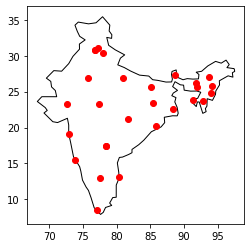

In [18]:
# We restrict to India.
ax = world[world.name == 'India'].plot(color='white', edgecolor='black')
cities.plot(ax=ax, color='red')


### HOW MANY WERE GEOCODED??

In [20]:
import numpy as np
print("{}% of addresses were geocoded!".format(
    (1 - sum(np.isnan(cities["Latitude"])) / len(cities)) * 100))

100.0% of addresses were geocoded!


### COVID CASES

In [9]:
add1="C:/Users/ANTHONY/Desktop/CSV&XLSX/india_covid_19_state_wise_info.csv"
co=pd.read_csv(add1)
co['state_ut'] = co['state_ut'].astype(str)
co.rename(columns={'state_ut': 'States Name'}, inplace=True)
co

,sl_no,States Name,confirmed_cases,active_cases,recovered_cases,death_cases
0,2,Andaman and Nicobar Islands,3712,166,3494,52
1,1,Andhra Pradesh,646530,70357,570667,5506
2,3,Arunachal Pradesh,8133,2216,5903,14
3,4,Assam,163491,30182,132712,597
4,5,Bihar,172854,12958,159022,874
5,6,Chandigarh,10726,2537,8049,140
6,7,Chhattisgarh,93351,35850,56773,728
7,8,Dadra and Nagar Haveli and Daman and Diu,2962,205,2755,2
8,10,Delhi,256789,30836,220866,5087
9,11,Goa,29879,5646,23857,376


In [22]:

cojoi=cities.join(co.set_index('States Name'), on='States Name')
cojoi=cojoi.dropna()
cojo=cojoi[['States Name', 'Capital', 'Latitude', 'Longitude','active_cases']]
cojo

,States Name,Capital,Latitude,Longitude,active_cases
0,Andhra Pradesh,Hyderabad,17.360589,78.474061,70357.0
1,Arunachal Pradesh,Itanagar,27.097966,93.623729,2216.0
2,Assam,Dispur,26.151308,91.793380,30182.0
3,Bihar,Patna,25.609324,85.123525,12958.0
4,Chhattisgarh,Raipur,21.237947,81.633683,35850.0
5,Goa,Panaji,15.498995,73.828214,5646.0
6,Gujarat,Gandhinagar,23.223288,72.649227,16438.0
7,Haryana,Chandigarh,30.733442,76.779714,19276.0
8,Himachal Pradesh,Shimla,31.104153,77.170973,3950.0
9,Jharkhand,Ranchi,23.370035,85.325013,12882.0


In [10]:
import folium
map2 = folium.Map(location=[23.0707, 80.0982],zoom_start=5,min_zoom=1,max_zoom=6)
for lab, row in cojo.iterrows() :

    folium.Marker(location=(row['Latitude'],row['Longitude']),icon=folium.Icon(icon_color='white'),popup=row['active_cases'],tooltip='<strong>Click here to see Popup</strong>').add_to(map2)
# Plotting 
map2

NameError: name 'cojo' is not defined